In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./nba_scraped_data.csv')
df

,#,PLAYER,TEAM,GP,MIN,PTS,FGM,FGA,FG%,3PM,...,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,EFF,YEAR
0,2023-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Joel Embiid,PHI,22.0,33.9,34.2,11.4,21.4,53.4,1.1,...,89.0,3.0,8.7,11.7,6.0,1.1,1.9,3.8,39.9,2023-24
2,2,Luka Doncic,DAL,24.0,36.8,32.7,11.3,23.0,48.8,3.8,...,80.0,0.7,7.6,8.3,9.1,1.3,0.5,4.0,34.5,2023-24
3,3,Giannis Antetokounmpo,MIL,24.0,34.6,31.6,11.8,18.8,62.6,0.4,...,67.4,2.6,8.1,10.7,5.0,1.5,1.2,3.8,35.6,2023-24
4,4,Shai Gilgeous-Alexander,OKC,23.0,35.0,30.7,11.2,20.7,54.2,1.0,...,91.3,0.9,4.6,5.5,6.4,2.7,0.8,2.0,34.0,2023-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,257,Tristan Thompson,CLE,21.0,10.0,2.9,1.3,1.8,73.0,0.0,...,41.2,1.4,1.8,3.2,0.7,0.1,0.4,0.5,5.8,2023-24
258,258,Andre Jackson Jr.,MIL,19.0,8.9,2.4,1.0,1.7,59.4,0.4,...,0.0,0.6,0.9,1.6,0.7,0.3,0.0,0.5,3.8,2023-24
259,259,Furkan Korkmaz,PHI,18.0,7.2,2.0,0.7,1.9,35.3,0.3,...,77.8,0.1,0.4,0.5,0.6,0.6,0.0,0.4,1.9,2023-24
260,260,Cody Zeller,NOP,20.0,9.5,1.8,0.6,1.7,32.4,0.0,...,54.2,1.1,1.8,2.9,1.1,0.2,0.1,0.3,4.0,2023-24


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262 entries, 0 to 261
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   #       262 non-null    object 
 1   PLAYER  261 non-null    object 
 2   TEAM    261 non-null    object 
 3   GP      261 non-null    float64
 4   MIN     261 non-null    float64
 5   PTS     261 non-null    float64
 6   FGM     261 non-null    float64
 7   FGA     261 non-null    float64
 8   FG%     261 non-null    float64
 9   3PM     261 non-null    float64
 10  3PA     261 non-null    float64
 11  3P%     261 non-null    float64
 12  FTM     261 non-null    float64
 13  FTA     261 non-null    float64
 14  FT%     261 non-null    float64
 15  OREB    261 non-null    float64
 16  DREB    261 non-null    float64
 17  REB     261 non-null    float64
 18  AST     261 non-null    float64
 19  STL     261 non-null    float64
 20  BLK     261 non-null    float64
 21  TOV     261 non-null    float64
 22  EF

# Data Cleaning

In [4]:
# Drop rows that have 'NaN' values and '#' column
df = df.dropna()
df = df.drop('#', axis=1)

In [5]:
# Create a rearranged list 
arrange_columns = ['PLAYER', 'YEAR','TEAM', 'GP', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%', '3PM', '3PA',
       '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK',
       'TOV', 'EFF']

# Set dataframe to new columns
df = df[arrange_columns]

df.head()

,PLAYER,YEAR,TEAM,GP,MIN,PTS,FGM,FGA,FG%,3PM,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,EFF
1,Joel Embiid,2023-24,PHI,22.0,33.9,34.2,11.4,21.4,53.4,1.1,...,11.5,89.0,3.0,8.7,11.7,6.0,1.1,1.9,3.8,39.9
2,Luka Doncic,2023-24,DAL,24.0,36.8,32.7,11.3,23.0,48.8,3.8,...,7.9,80.0,0.7,7.6,8.3,9.1,1.3,0.5,4.0,34.5
3,Giannis Antetokounmpo,2023-24,MIL,24.0,34.6,31.6,11.8,18.8,62.6,0.4,...,11.4,67.4,2.6,8.1,10.7,5.0,1.5,1.2,3.8,35.6
4,Shai Gilgeous-Alexander,2023-24,OKC,23.0,35.0,30.7,11.2,20.7,54.2,1.0,...,8.0,91.3,0.9,4.6,5.5,6.4,2.7,0.8,2.0,34.0
5,Kevin Durant,2023-24,PHX,21.0,36.7,30.7,10.5,20.3,51.8,2.3,...,8.3,88.0,0.3,6.0,6.3,5.6,0.7,1.2,3.4,30.3


In [6]:
# Show the change
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 261 entries, 1 to 261
Data columns (total 23 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PLAYER  261 non-null    object 
 1   YEAR    261 non-null    object 
 2   TEAM    261 non-null    object 
 3   GP      261 non-null    float64
 4   MIN     261 non-null    float64
 5   PTS     261 non-null    float64
 6   FGM     261 non-null    float64
 7   FGA     261 non-null    float64
 8   FG%     261 non-null    float64
 9   3PM     261 non-null    float64
 10  3PA     261 non-null    float64
 11  3P%     261 non-null    float64
 12  FTM     261 non-null    float64
 13  FTA     261 non-null    float64
 14  FT%     261 non-null    float64
 15  OREB    261 non-null    float64
 16  DREB    261 non-null    float64
 17  REB     261 non-null    float64
 18  AST     261 non-null    float64
 19  STL     261 non-null    float64
 20  BLK     261 non-null    float64
 21  TOV     261 non-null    float64
 22  EF

# Visualization

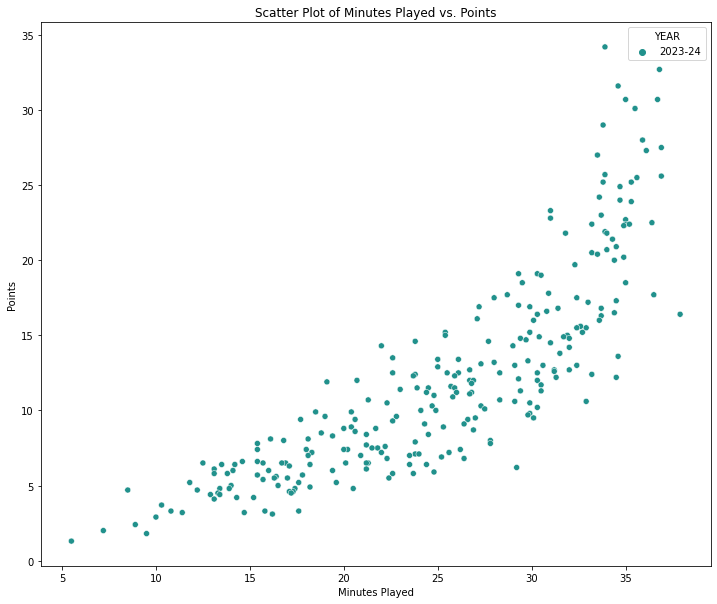

In [7]:
# Create a scatter plot on minutes vs points scored
plt.figure(figsize=(12, 10))
sns.scatterplot(x='MIN', y='PTS', data=df, hue='YEAR', palette='viridis')
plt.title('Scatter Plot of Minutes Played vs. Points')
plt.xlabel('Minutes Played')
plt.ylabel('Points')
plt.show()


In [8]:
# Find the top 10 players with the most assists the of the 2023-24 season
assists_df = df.loc[df['AST'] >=6].head(10)
assists_df.sort_values(by='AST', ascending=False, inplace=True)
assists_df

,PLAYER,YEAR,TEAM,GP,MIN,PTS,FGM,FGA,FG%,3PM,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,EFF
12,Tyrese Haliburton,2023-24,IND,21.0,33.9,25.7,9.0,17.5,51.5,3.7,...,4.6,87.6,0.7,3.4,4.1,12.0,0.9,0.7,2.6,31.8
8,Trae Young,2023-24,ATL,23.0,35.9,28.0,8.7,20.4,42.8,3.4,...,8.2,87.2,0.6,2.3,2.9,10.8,1.3,0.2,4.2,26.3
11,Nikola Jokic,2023-24,DEN,26.0,33.5,27.0,10.5,19.3,54.1,1.2,...,6.3,78.7,3.3,9.1,12.4,9.5,1.2,0.8,2.7,38.0
2,Luka Doncic,2023-24,DAL,24.0,36.8,32.7,11.3,23.0,48.8,3.8,...,7.9,80.0,0.7,7.6,8.3,9.1,1.3,0.5,4.0,34.5
15,LeBron James,2023-24,LAL,24.0,33.8,25.2,9.4,17.2,54.5,2.3,...,5.8,71.4,1.0,6.5,7.5,7.0,1.5,0.7,3.4,29.1
16,Damian Lillard,2023-24,MIL,23.0,35.3,25.2,7.3,17.1,42.4,3.0,...,8.3,91.6,0.6,3.9,4.5,6.9,1.0,0.3,2.8,24.5
13,Tyrese Maxey,2023-24,PHI,24.0,36.9,25.6,8.8,19.0,46.4,3.2,...,5.4,89.1,0.5,3.4,3.9,6.7,0.9,0.6,1.3,25.5
4,Shai Gilgeous-Alexander,2023-24,OKC,23.0,35.0,30.7,11.2,20.7,54.2,1.0,...,8.0,91.3,0.9,4.6,5.5,6.4,2.7,0.8,2.0,34.0
6,De'Aaron Fox,2023-24,SAC,18.0,35.5,30.1,10.6,22.2,47.5,3.2,...,7.9,73.2,0.9,3.5,4.4,6.4,1.4,0.3,2.6,26.2
1,Joel Embiid,2023-24,PHI,22.0,33.9,34.2,11.4,21.4,53.4,1.1,...,11.5,89.0,3.0,8.7,11.7,6.0,1.1,1.9,3.8,39.9


In [9]:
# Find the top 10 players with the most rebounds the of the 2023-24 season
rebounds_df = df.loc[df['REB'] > 6].head(10)
rebounds_df .sort_values(by='REB', ascending=False, inplace=True)
rebounds_df 

,PLAYER,YEAR,TEAM,GP,MIN,PTS,FGM,FGA,FG%,3PM,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,EFF
20,Anthony Davis,2023-24,LAL,24.0,35.3,23.9,9.0,16.5,54.4,0.3,...,7.0,81.7,3.6,8.9,12.5,3.0,1.1,2.6,2.0,32.3
11,Nikola Jokic,2023-24,DEN,26.0,33.5,27.0,10.5,19.3,54.1,1.2,...,6.3,78.7,3.3,9.1,12.4,9.5,1.2,0.8,2.7,38.0
1,Joel Embiid,2023-24,PHI,22.0,33.9,34.2,11.4,21.4,53.4,1.1,...,11.5,89.0,3.0,8.7,11.7,6.0,1.1,1.9,3.8,39.9
3,Giannis Antetokounmpo,2023-24,MIL,24.0,34.6,31.6,11.8,18.8,62.6,0.4,...,11.4,67.4,2.6,8.1,10.7,5.0,1.5,1.2,3.8,35.6
27,Karl-Anthony Towns,2023-24,MIN,24.0,33.2,22.4,8.1,15.7,51.6,2.0,...,4.6,90.1,1.5,8.0,9.5,3.0,0.9,0.7,2.9,25.6
26,Julius Randle,2023-24,NYK,25.0,35.0,22.4,8.1,17.6,46.0,1.6,...,6.2,74.0,2.1,7.3,9.4,5.3,0.6,0.2,3.3,23.6
9,Jayson Tatum,2023-24,BOS,24.0,36.9,27.5,9.5,19.6,48.7,3.0,...,6.8,79.3,0.7,8.0,8.8,4.2,1.0,0.5,3.2,27.2
2,Luka Doncic,2023-24,DAL,24.0,36.8,32.7,11.3,23.0,48.8,3.8,...,7.9,80.0,0.7,7.6,8.3,9.1,1.3,0.5,4.0,34.5
15,LeBron James,2023-24,LAL,24.0,33.8,25.2,9.4,17.2,54.5,2.3,...,5.8,71.4,1.0,6.5,7.5,7.0,1.5,0.7,3.4,29.1
5,Kevin Durant,2023-24,PHX,21.0,36.7,30.7,10.5,20.3,51.8,2.3,...,8.3,88.0,0.3,6.0,6.3,5.6,0.7,1.2,3.4,30.3


In [10]:
# Find the top 10 scorers of the 2023-24 season
top_ten_df = df.loc[df['YEAR'] == '2023-24'].head(10)
top_ten_df.sort_values(by='PTS', ascending=False, inplace=True)
top_ten_df

,PLAYER,YEAR,TEAM,GP,MIN,PTS,FGM,FGA,FG%,3PM,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,EFF
1,Joel Embiid,2023-24,PHI,22.0,33.9,34.2,11.4,21.4,53.4,1.1,...,11.5,89.0,3.0,8.7,11.7,6.0,1.1,1.9,3.8,39.9
2,Luka Doncic,2023-24,DAL,24.0,36.8,32.7,11.3,23.0,48.8,3.8,...,7.9,80.0,0.7,7.6,8.3,9.1,1.3,0.5,4.0,34.5
3,Giannis Antetokounmpo,2023-24,MIL,24.0,34.6,31.6,11.8,18.8,62.6,0.4,...,11.4,67.4,2.6,8.1,10.7,5.0,1.5,1.2,3.8,35.6
4,Shai Gilgeous-Alexander,2023-24,OKC,23.0,35.0,30.7,11.2,20.7,54.2,1.0,...,8.0,91.3,0.9,4.6,5.5,6.4,2.7,0.8,2.0,34.0
5,Kevin Durant,2023-24,PHX,21.0,36.7,30.7,10.5,20.3,51.8,2.3,...,8.3,88.0,0.3,6.0,6.3,5.6,0.7,1.2,3.4,30.3
6,De'Aaron Fox,2023-24,SAC,18.0,35.5,30.1,10.6,22.2,47.5,3.2,...,7.9,73.2,0.9,3.5,4.4,6.4,1.4,0.3,2.6,26.2
7,Stephen Curry,2023-24,GSW,23.0,33.8,29.0,9.0,19.1,46.9,5.0,...,6.4,93.9,0.6,4.3,4.9,4.2,0.7,0.3,3.3,25.3
8,Trae Young,2023-24,ATL,23.0,35.9,28.0,8.7,20.4,42.8,3.4,...,8.2,87.2,0.6,2.3,2.9,10.8,1.3,0.2,4.2,26.3
9,Jayson Tatum,2023-24,BOS,24.0,36.9,27.5,9.5,19.6,48.7,3.0,...,6.8,79.3,0.7,8.0,8.8,4.2,1.0,0.5,3.2,27.2
10,Donovan Mitchell,2023-24,CLE,21.0,36.1,27.3,9.4,21.0,44.9,3.0,...,6.1,88.3,1.1,4.7,5.8,5.5,1.9,0.4,2.7,25.9


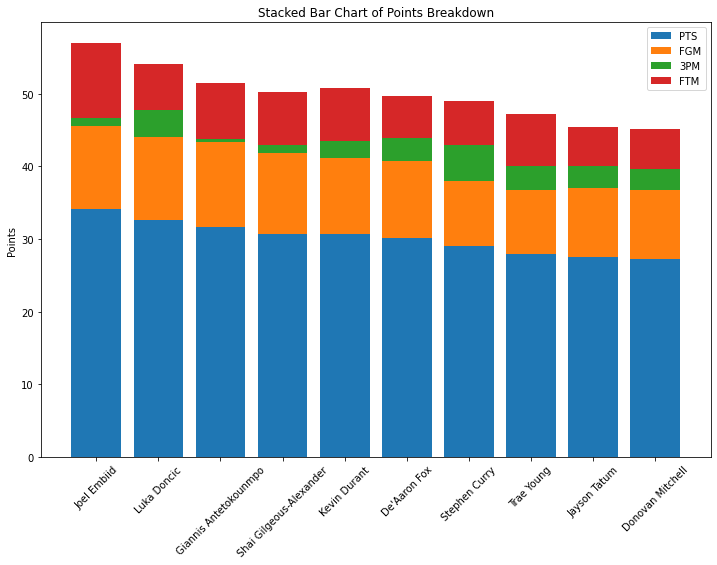

In [11]:
# Create stacked bar plot
fig, ax = plt.subplots(figsize=(12, 8))

# Stack the bars for different categories
bottom = None
for col in ['PTS', 'FGM', '3PM', 'FTM']:
    ax.bar(top_ten_df['PLAYER'], top_ten_df[col], label=col, bottom=bottom)
    if bottom is None:
        bottom = top_ten_df[col]
    else:
        bottom += top_ten_df[col]

ax.set_ylabel('Points')
ax.set_title('Stacked Bar Chart of Points Breakdown')
ax.legend()
plt.xticks(rotation=45)
plt.show()

In [12]:
# Create a dataframe for players with the most rebounds
top_ten_rebounds = df.loc[df['REB'] > 4].head(10)
top_ten_rebounds = top_ten_rebounds[['PLAYER', 'YEAR', 'MIN', 'PTS', 'REB']]
top_ten_rebounds_sorted = top_ten_rebounds.sort_values(by='REB', ascending=False)

In [13]:
print(top_ten_rebounds_sorted)

                     PLAYER     YEAR   MIN   PTS   REB
11             Nikola Jokic  2023-24  33.5  27.0  12.4
1               Joel Embiid  2023-24  33.9  34.2  11.7
3     Giannis Antetokounmpo  2023-24  34.6  31.6  10.7
9              Jayson Tatum  2023-24  36.9  27.5   8.8
2               Luka Doncic  2023-24  36.8  32.7   8.3
5              Kevin Durant  2023-24  36.7  30.7   6.3
10         Donovan Mitchell  2023-24  36.1  27.3   5.8
4   Shai Gilgeous-Alexander  2023-24  35.0  30.7   5.5
7             Stephen Curry  2023-24  33.8  29.0   4.9
6              De'Aaron Fox  2023-24  35.5  30.1   4.4


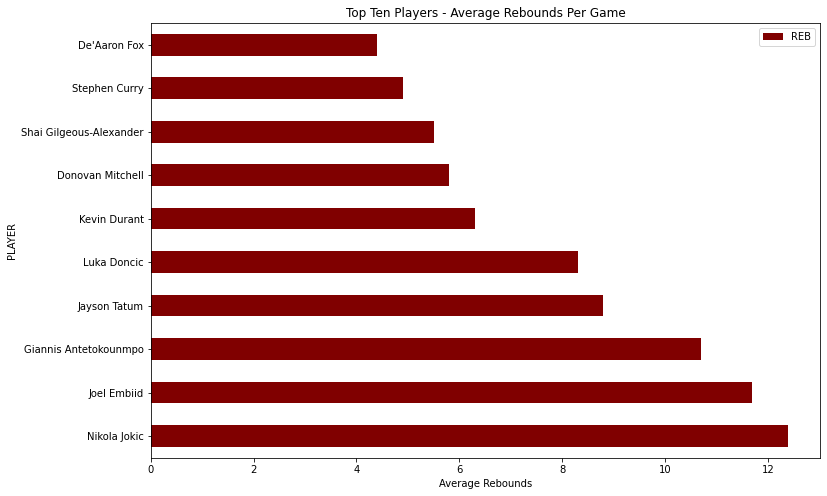

In [14]:
# Plotting bars in descending order
top_ten_rebounds_sorted.plot.barh(x='PLAYER', y='REB', color='maroon', figsize=(12, 8))

# Adding labels and title
plt.xlabel('Average Rebounds')
plt.title('Top Ten Players - Average Rebounds Per Game')

# Display the plot
plt.show()

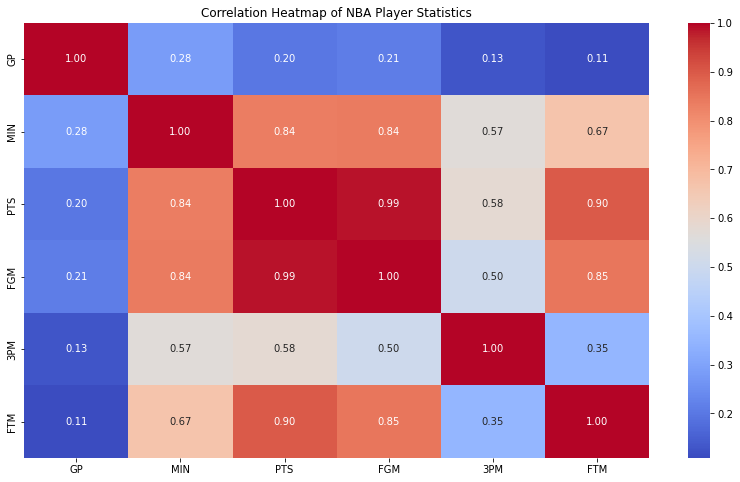

In [15]:
heatmap_columns = ['GP', 'MIN', 'PTS', 'FGM', '3PM', 'FTM']

# Create heatmap dataframe
heatmap_data = df[heatmap_columns]

# Create heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of NBA Player Statistics')
plt.show()

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 261 entries, 1 to 261
Data columns (total 23 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PLAYER  261 non-null    object 
 1   YEAR    261 non-null    object 
 2   TEAM    261 non-null    object 
 3   GP      261 non-null    float64
 4   MIN     261 non-null    float64
 5   PTS     261 non-null    float64
 6   FGM     261 non-null    float64
 7   FGA     261 non-null    float64
 8   FG%     261 non-null    float64
 9   3PM     261 non-null    float64
 10  3PA     261 non-null    float64
 11  3P%     261 non-null    float64
 12  FTM     261 non-null    float64
 13  FTA     261 non-null    float64
 14  FT%     261 non-null    float64
 15  OREB    261 non-null    float64
 16  DREB    261 non-null    float64
 17  REB     261 non-null    float64
 18  AST     261 non-null    float64
 19  STL     261 non-null    float64
 20  BLK     261 non-null    float64
 21  TOV     261 non-null    float64
 22  EF

In [17]:
# Export cleaned data frame
file_path = 'nba_cleaned_data.csv'
df.to_csv(file_path, index=False)